# Bellabet Smart Devices Data Analysis 
#### Case Study for the final project of the Google Data Analytics Professional Certificate

Bellabet is a hight-tech company that manufactures high-tech health products focused on women's health, the smart devices collect data on activity, sleep, stress and reproductive health. We will analyze the data from some of this users to answer the following questions: 

1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

#### Data

The [data set][1] is public domain. In this data set there are information about the personal tracker FitBit of 30 eligible users that gave consent to send the data about their health, activity tracker, heart rate and sleep monitoring. We can use this information to know more about the habits of the users.

#### Analysis

1. Import packages that we will utilize along the analysis.

[1]: https://www.kaggle.com/datasets/arashnic/fitbit

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

2. Import the data that we will use on the analysis. The data set is already clean.

In [2]:
daily_steps = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv')
daily_calo = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv')
daily_inte = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv')
sleep_day = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
weight_log = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

3. Starting with the daily activities analysis, using the 'daily_inte' DataFrame.

In [3]:
daily_inte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


4. After verifying the columns and type of data, we'll creat a new columns called 'TotalActiveMinutes' that will sum the 3 columns of activities 'LightlyActiveMinutes', 'FairlyActiveMinutes' and 'VeryActiveMinutes' and then create 2 pie graphs, the firs one will show de percentage of daily activities and idle time ('SedentaryMinutes'), the second one will show the percentage of each activity intensity per day (In the 2 graphs we'll use average values).

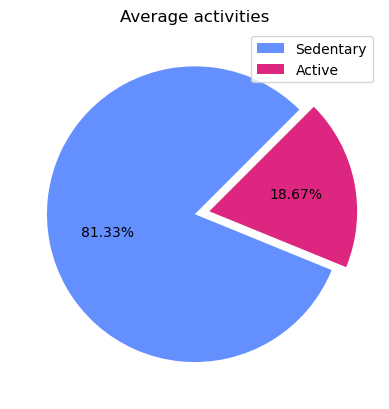

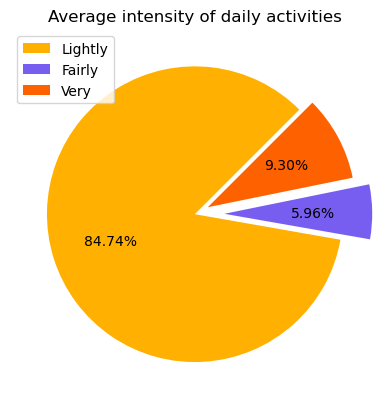

In [4]:
# Gráfico em pizza com as porcentagens dos minutos 'Active' e 'Sedentary'
daily_inte['TotalActiveMinutes'] = daily_inte['LightlyActiveMinutes'] + daily_inte['FairlyActiveMinutes'] + daily_inte['VeryActiveMinutes']
daily_inte_sen_act = daily_inte[['SedentaryMinutes','TotalActiveMinutes']].agg('mean')
plt.pie(daily_inte_sen_act,autopct="%.2f%%",explode=(0,0.1),colors=['#648FFF','#DC267F'],startangle=45)
plt.legend(['Sedentary','Active'])
plt.title('Average activities')
plt.show()

# Gráfico em pizza com as pocrentagens de cada atividade 
daily_inte_total = daily_inte[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].agg('mean')
plt.pie(daily_inte_total,autopct='%.2f%%',colors=['#FFB000','#785EF0','#FE6100'],explode=(0,0.2,0.1),startangle=45)
plt.title('Average intensity of daily activities')
plt.legend(['Lightly','Fairly','Very'])
plt.show()

5. We can see on the first graph that the idle time is greater than the activity time, as sleep time is included. In the second graph we can see that the lightly activities ('Lightly Active Minutes') has the highest percentage, that can indicate that the users do casual exercises, probably they are not professional. Below we can see that the daily activity average is aproximately 3 hours and 48 minutes.

In [5]:
daily_inte['TotalActiveMinutes'].describe()

count    940.000000
mean     227.542553
std      121.776307
min        0.000000
25%      146.750000
50%      247.000000
75%      317.250000
max      552.000000
Name: TotalActiveMinutes, dtype: float64

6. Still utilyzing 'daily_inte' we'll creat a new column 'DayOfWeek' with the data of 'ActivityDay' columns so we can extract which day of the week the data belongs to. Then we'll group by day of week and plot a bar graph to see if there is any difference in the activity hours depending on the day.

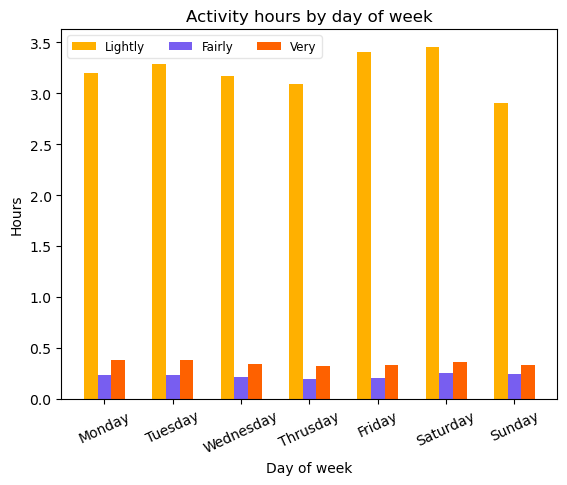

In [6]:
daily_inte['ActivityDay'] = pd.to_datetime(daily_inte['ActivityDay'])
daily_inte['DayOfWeek'] = pd.DatetimeIndex(daily_inte['ActivityDay']).dayofweek
daily_inte_grouped = daily_inte.groupby('DayOfWeek')[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].agg('mean')
plt.bar(np.arange(7)-0.2,daily_inte_grouped['LightlyActiveMinutes']/60,width=0.2,label='Lightly',color='#FFB000')
plt.bar(np.arange(7),daily_inte_grouped['FairlyActiveMinutes']/60,width=0.2,label='Fairly',color='#785EF0')
plt.bar(np.arange(7)+0.2,daily_inte_grouped['VeryActiveMinutes']/60,width=0.2,label='Very',color='#FE6100')
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],rotation=25)
plt.legend(framealpha=0.5,ncol=3,fontsize=8.5)
plt.title('Activity hours by day of week')
plt.xlabel('Day of week')
plt.ylabel('Hours')
plt.show()


7. We can see that there's no much difference in the moderate ('FairlyActiveMinutes) and very ('VeryActiveMinutes) activities, and even the light activity ('LightlyActiveMinutes') had a few changes, we can see a growth in Friday and Saturday, and a decrese on Sunday.

In [7]:
daily_calo.info()
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


8. Now we'll se the relationship between calories and weight, first we'll verify how many unique data we have on each, on previous analysis we got the information that the 2 datas has different quantities. We'll use 'daily_calo' and 'weight_log'.

In [8]:
print(len(daily_calo['Id'].unique()))
print(len(weight_log['Id'].unique()))

33
8


9. The previous code show us that we have 33 unique users on calories data and 8 unique users on weight data. Although is it not a large enough number to work with and draw concrete conclusions, we'll analyze it. Next step is to creat new column 'ActivityDay' on 'weight_log', changing the format of column 'Date' and the same change in the columns 'ActivityDay' on 'ddaily_calo'.

In [9]:
daily_calo['ActivityDay'] = pd.to_datetime(daily_calo['ActivityDay'])
weight_log['ActivityDay'] = pd.to_datetime(weight_log['Date']).dt.normalize()

10. After that we'll filter ('daily_calo_filtered') to correlate the two DataFrames, we will remove the users that doesn't have weight info, and then we'll merge the data on 'calo_weight'.

In [10]:
daily_calo_filtered= daily_calo[daily_calo['Id'].isin(weight_log['Id'].unique().tolist())]
calo_weight = daily_calo_filtered.merge(weight_log,on=['Id','ActivityDay'],how='outer')
calo_weight.groupby('Id')['WeightKg'].agg(['count','max','min'])

,count,max,min
Id,,,
1503960366,2,52.599998,52.599998
1927972279,1,133.500000,133.500000
2873212765,2,57.299999,56.700001
4319703577,2,72.400002,72.300003
4558609924,5,70.300003,69.099998
5577150313,1,90.699997,90.699997
6962181067,30,62.500000,61.000000
8877689391,24,85.800003,84.000000


11. We can see that 6 of 8 users have few weight registers, and little variation. So we'll use the 2 users that has more info about the weight ('6962181067' e '8877689391'). Consider that the sample doesn't cover enough data for a concrete conclusion.

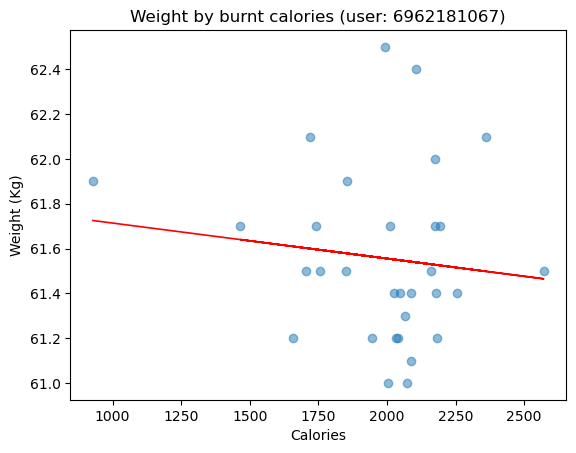

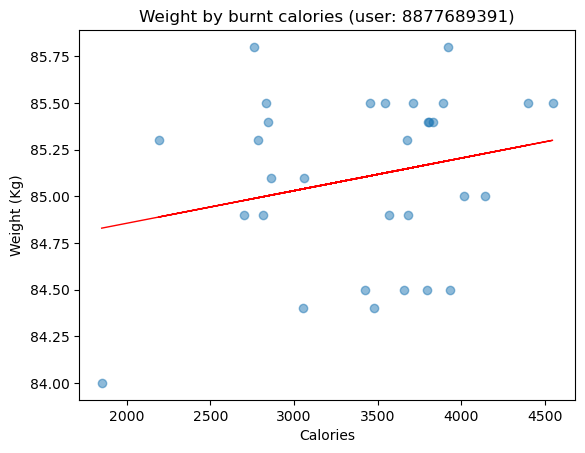

In [11]:
# Usuário 6962181067
y = calo_weight.query('Id == 6962181067')['WeightKg'].ffill()
x = calo_weight.query('Id == 6962181067')['Calories']
plt.scatter(x, y, alpha=0.5)
b, a = np.polyfit(x, y, deg=1)                                                                                              
plt.plot(x, a + b * x, color="red", lw=1.2)
plt.title('Weight by burnt calories (user: 6962181067)')
plt.ylabel('Weight (Kg)')
plt.xlabel('Calories')
plt.show()

# Usuário 8877689391
y_2 = calo_weight.query('Id == 8877689391')['WeightKg'].ffill()
x_2 = calo_weight.query('Id == 8877689391')['Calories']
plt.scatter(x_2, y_2, alpha=0.5)
d, c = np.polyfit(x_2, y_2, deg=1)                                                                                              
plt.plot(x_2, c + d * x_2, color="red", lw=1)
plt.title('Weight by burnt calories (user: 8877689391)')
plt.ylabel('Weight (Kg)')
plt.xlabel('Calories')
plt.show()



12. We can see that the two users have different behaviors, the user '6962181067' had a weight variation, the red line indicates a weak negative correlation  a linha vermelha indica uma correlação negativa fraca, the more calories burned the less weight. The user '8877689391' gained weight and burned more calories, that can indicate weak positive correlation (red line). In order to draw a conclusion we would need more data on calories burned, calories consumed and weight, and other informations, like goal (weight loss or muscle gain, and so on).

In [12]:
print(len(daily_steps['Id'].unique()))
print(len(daily_calo['Id'].unique()))


33
33


13. Now we'll see the relationship between calories ('daily_calo') and steps ('daily_steps'), there's 33 unique users on both DataFrames, we'll merge the data on 'calo_step' and plot a graph.

In [13]:
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'])
calo_step = daily_steps.merge(daily_calo,how='inner',on=['Id','ActivityDay'])
calo_step.describe()

,Id,StepTotal,Calories
count,9.400000e+02,940.000000,940.000000
mean,4.855407e+09,7637.910638,2303.609574
std,2.424805e+09,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,3789.750000,1828.500000
50%,4.445115e+09,7405.500000,2134.000000
75%,6.962181e+09,10727.000000,2793.250000
max,8.877689e+09,36019.000000,4900.000000


14. There's some zero values, that can be bad input or the users was not using the device, we'll filter the values.

In [14]:
calo_step = calo_step.query('StepTotal > 10 & Calories > 0')
calo_step.describe()

,Id,StepTotal,Calories
count,8.600000e+02,860.000000,860.000000
mean,4.862318e+09,8348.389535,2364.253488
std,2.417368e+09,4727.704577,702.009824
min,1.503960e+09,16.000000,52.000000
25%,2.320127e+09,4932.000000,1859.750000
50%,4.445115e+09,8056.500000,2221.500000
75%,6.962181e+09,11100.250000,2833.000000
max,8.877689e+09,36019.000000,4900.000000


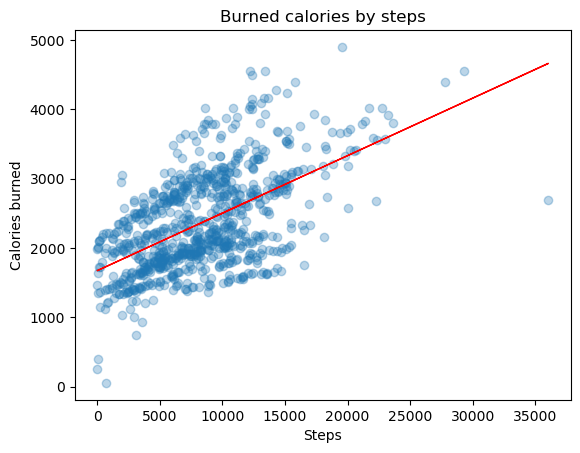

In [15]:
x_3 = calo_step['StepTotal']
y_3 = calo_step['Calories']
plt.scatter(x_3, y_3,alpha=0.3)
f, e = np.polyfit(x_3, y_3, deg=1)                                                                                              
plt.plot(x_3, e + f * x_3, color="red", lw=1)
plt.xlabel('Steps')
plt.ylabel('Calories burned')
plt.title('Burned calories by steps')
plt.show()

15. In the graph above we can see that calories burned and steps has a positive correlation (indicated by the red line), so if the users wants to lose more calories, they should increse the number of steps (To indicate causality between this relationship we should have more data and more studies, for now we can only point to a correlation).

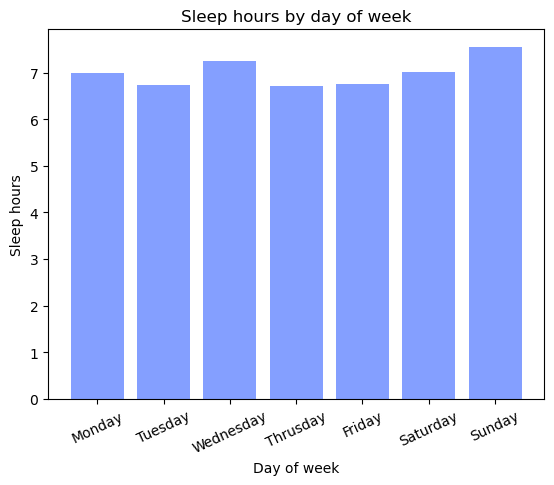

In [16]:
sleep_day['ActivityDay'] = pd.to_datetime(sleep_day['SleepDay'])
sleep_day['DayOfWeek'] = pd.DatetimeIndex(sleep_day['ActivityDay']).dayofweek
weekday_sleep = sleep_day.groupby('DayOfWeek')['TotalMinutesAsleep'].agg('mean')
plt.bar(weekday_sleep.index,weekday_sleep.values/60,color='#849FFF')
plt.xticks(weekday_sleep.index,['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'],rotation=25)
plt.title('Sleep hours by day of week')
plt.xlabel('Day of week')
plt.ylabel('Sleep hours')
plt.show()


16. We ploted a 'Sleep hours by day of week' graph to see how the users sleep in the week. The average is 7 hours of sleep per day, having a increase on Wednesday and Sunday.

In [17]:
print(len(sleep_day['Id'].unique()))
print(len(daily_inte['Id'].unique()))

24
33


17. Now we'll analyze the sleep and idle data, first we verify that we have 24 unique sleep data ('sleep_day') and 33 unique activity data ('daily_inte'). Enough data to do the analysis in this sample, we'll merge the two DataFrames on 'sleep_sede' and then plot the graph.

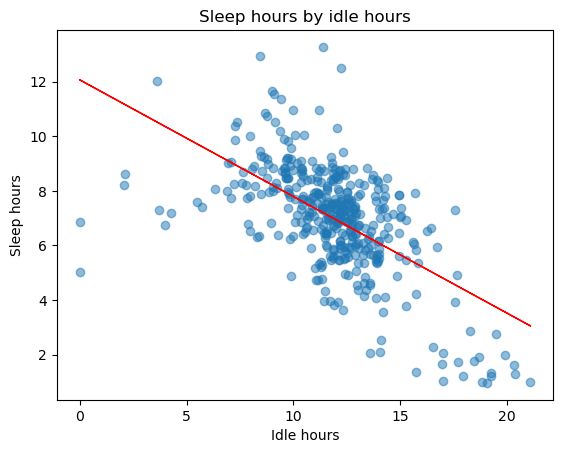

In [18]:
sleep_sede = sleep_day.merge(daily_inte,on=['Id','ActivityDay'],how='inner')
x_4 = sleep_sede['SedentaryMinutes']/60
y_4 = sleep_sede['TotalMinutesAsleep']/60
plt.scatter(x_4, y_4,alpha=0.5)
h, g = np.polyfit(x_4, y_4, deg=1)                                                                                              
plt.plot(x_4, g + h * x_4, color="red", lw=1)
plt.xlabel('Idle hours')
plt.ylabel('Sleep hours')
plt.title('Sleep hours by idle hours')
plt.show()

18. The graph above show us that there is a negative corralations between the variables (red line graph). Therefore we can say that the more idle time, less sleep the user has. Remembering that this information cannot be affirmed as causality, we would need more data and information to say that one causes the other.

#### Conclusion

Let's answer each question:

**1.	What are some trends in smart device usage?**

People who use smart devices tend to have or want to be healthier, and smart devices help monitor activity data so that users can understand what they need to adjust, improve or decrease to reach their goals.

We can observe that there is more data in relation to steps than in weight records. Data that has to be entered by the user are in smaller quantities, and data that is passively collected by the devices are more in-depth. In this data sample, with the same idea, we can observe that there is less sleep data, many people can find sleeping with the device uncomfortable. However, we cannot say because we would need more data and more research to reach this conclusion in a concrete way.


**2.	How could these trends apply to Bellabeat customers?**

By the trends of some graphs we can assume that smart device users are people with an active life, we saw that the highest percentage of activity is light ('LightlyActiveMinutes'), which covers day-to-day activities (job, school, chores, leisure) and moderate('FairlyActiveMinutes') and intense('VeryActiveMinutes') activities are in a smaller percentage, which may indicate a constant trip to the gym or some more intense activity .

We've seen charts that shows a positive correlation between burning calories and steps, so the more steps users take, the more calories they lose. And we also saw the negative correlation between hours of sleep and idle hours, the more idle time, the less hours of sleep users have.

**3.	How could these trends help influence Bellabeat marketing strategy?**

Trends can help create marketing campaigns, for example, campaigns to improve sleep for users, ecouraging them to have less idle time during the day. Or increase physical activity depending on the user's goal, weight loss, weight gain and others. Create alerts for users of number of steps, calories lost and sleep scores to improve their health.

The marketing would be focused on the quality of life and how we can acquire it. Helping the user to understand their own data and how to improve it depending on the specific health objective.

Smart devices are aimed at people who already are active or who want to be more active and healthy. So marketing has to be done around these areas, on websites, pages focused on physical activity and health, as well as advertisements in places close to gyms, health centers, hospitals, aesthetic clinics and outdoor leisure areas, or that have some type of activity.